   - Logistic regression this ROc UC
   - KNN 
   - Decision tree
   - Random forest
   - Adaboost
   - XGBoost this
   - SVMs
   - Naive Bayes
   
   pledge/ratio

In [57]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import roc, auc

#confusion_matrix(y_true, y_pred)

In [2]:
with open('cleaned_data.json') as json_file:
    data = json.load(json_file)

In [3]:
df = pd.read_json(data)

In [4]:
df.shape

(5424, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 0 to 999
Data columns (total 25 columns):
backers_count               5424 non-null int64
converted_pledged_amount    5424 non-null int64
country                     5424 non-null object
created_at                  5424 non-null datetime64[ns]
currency                    5424 non-null object
current_currency            5424 non-null object
deadline                    5424 non-null int64
disable_communication       5424 non-null bool
fx_rate                     5424 non-null float64
goal                        5424 non-null int64
id                          5424 non-null int64
is_starrable                5424 non-null bool
launched_at                 5424 non-null datetime64[ns]
name                        5424 non-null object
pledged                     5424 non-null float64
spotlight                   5424 non-null bool
staff_pick                  5424 non-null bool
state                       5424 non-null object
state_c

In [6]:
df.head(1)

,backers_count,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,fx_rate,goal,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,cat_name,cat_slug,loc_state
0,6,1847,GB,2015-04-03,GBP,USD,1430956800000,False,1.30399,7000,...,False,False,canceled,2015-04-19,1.491538,"{""web"":{""project"":""https://www.kickstarter.com...",1842.049134,Ready-to-wear,fashion/ready-to-wear,England


In [7]:
df['deadline'] = pd.to_datetime(df['deadline'], unit='ms')
df['deadline'] = pd.to_datetime(df['deadline'].dt.date)

In [39]:
df['time_allowed'] = df['state_changed_at']-df['created_at']

NameError: name 'strftime' is not defined

In [40]:
df.time_allowed = df.time_allowed.dt.days

In [ ]:
df['goal/pledge'] = (df['pledge']/df['time_allowed'])

In [9]:
# Get names of indexes for which column Age has value 30 #
indexNames = df[(df['state'] == 'canceled')|(df['state'] == 'live')|(df['state'] == 'suspended')].index
# Delete these row indexes from dataFrame
df.drop(indexNames,0,inplace=True)

In [10]:
df['state'].value_counts()

successful    3025
failed        1931
Name: state, dtype: int64

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.columns

Index(['backers_count', 'converted_pledged_amount', 'country', 'created_at',
       'currency', 'current_currency', 'deadline', 'disable_communication',
       'fx_rate', 'goal', 'id', 'is_starrable', 'launched_at', 'name',
       'pledged', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'cat_name', 'cat_slug',
       'loc_state', 'time_allowed'],
      dtype='object')

In [41]:
X_c = df[['time_allowed','goal', 'backers_count','pledged', ]]

In [ ]:
scaler = StandardScaler()
scaler.fit(X_c)

In [42]:
X_c

,time_allowed,goal,backers_count,pledged
0,386,6000,27,6080.00
1,57,4500,8,423.00
2,35,300,0,0.00
3,79,700,36,1538.00
4,30,1000,26,1460.00
5,52,500,16,627.00
6,35,12500,74,12610.00
7,41,45000,17,47318.80
8,73,1760,44,2005.00
9,54,10000,1143,161965.00


In [15]:
X_d = pd.get_dummies(df[['cat_slug', 'country', 'spotlight', 'staff_pick']], drop_first=True, prefix_sep='_')

In [16]:
X_d.head()

,spotlight,staff_pick,cat_slug_art/ceramics,cat_slug_art/conceptual art,cat_slug_art/digital art,cat_slug_art/illustration,cat_slug_art/installations,cat_slug_art/mixed media,cat_slug_art/painting,cat_slug_art/performance art,...,country_IE,country_IT,country_JP,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,True,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,False,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,True,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,True,False,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
X = pd.concat([X_c,X_d],1)

In [18]:
X

,time_allowed,goal,backers_count,pledged,spotlight,staff_pick,cat_slug_art/ceramics,cat_slug_art/conceptual art,cat_slug_art/digital art,cat_slug_art/illustration,...,country_IE,country_IT,country_JP,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,386 days,6000,27,6080.00,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57 days,4500,8,423.00,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,35 days,300,0,0.00,False,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,79 days,700,36,1538.00,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30 days,1000,26,1460.00,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,52 days,500,16,627.00,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,35 days,12500,74,12610.00,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,41 days,45000,17,47318.80,True,False,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,73 days,1760,44,2005.00,True,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,54 days,10000,1143,161965.00,True,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
y = pd.get_dummies(df[['state']], drop_first=True)

In [20]:
y

,state_successful
0,1
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


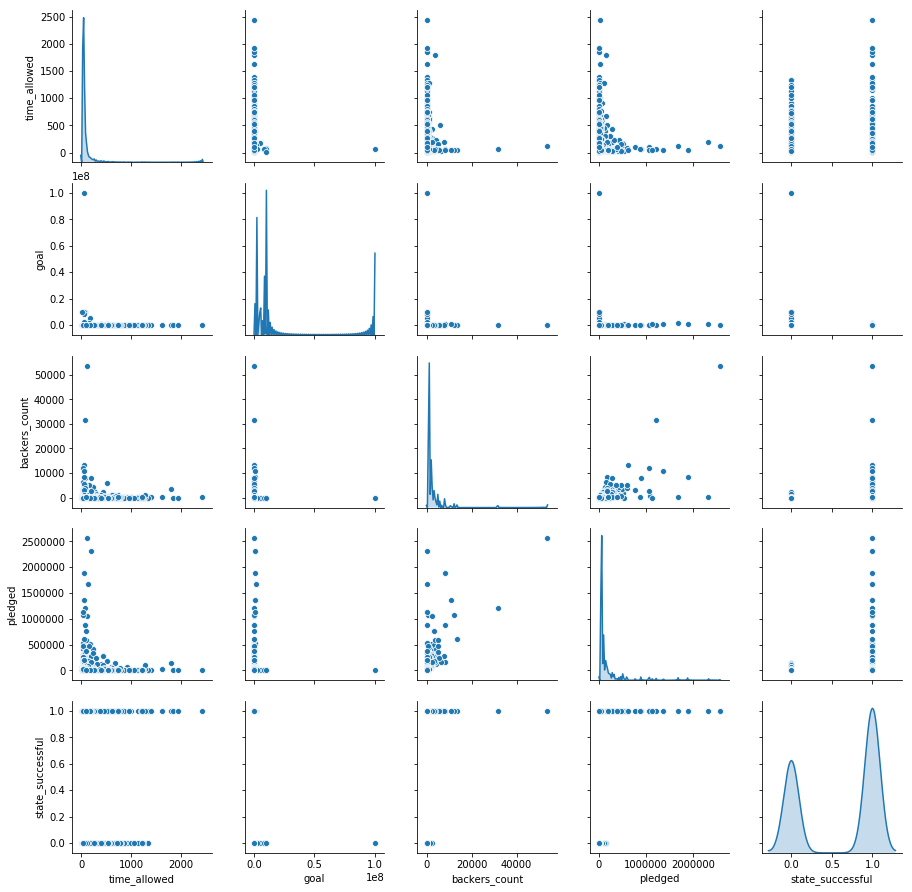

In [44]:
sns.pairplot(pd.concat([X_c,y],1), diag_kind="kde", height=2.5)

In [45]:
(pd.concat([X_c,y],1)).corr()

,time_allowed,goal,backers_count,pledged,state_successful
time_allowed,1.000000,-0.001358,0.031257,0.028616,0.019897
goal,-0.001358,1.000000,0.000163,0.014184,-0.032686
backers_count,0.031257,0.000163,1.000000,0.668580,0.107650
pledged,0.028616,0.014184,0.668580,1.000000,0.123909
state_successful,0.019897,-0.032686,0.107650,0.123909,1.000000


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
forest = RandomForestClassifier(n_estimators=5, max_features=5, max_depth= 5)
forest.fit(X_train, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
y_hat_train = forest.predict(X_train)

In [54]:
len(y_hat_train)

3717

In [50]:
y_hat_test = forest.predict(X_test)

In [55]:
len(y_hat_test)

1239

In [51]:
forest.feature_importances_

array([1.90117936e-02, 3.61373625e-02, 2.08621980e-01, 2.29094810e-01,
       1.05751722e-01, 2.82075856e-03, 0.00000000e+00, 0.00000000e+00,
       4.19427125e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.67272020e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.48755808e-04,
       0.00000000e+00, 6.48526114e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.76875494e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.35981686e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.39212492e-05, 0.00000000e+00,
       0.00000000e+00, 2.85401796e-04, 0.00000000e+00, 0.00000000e+00,
      

In [58]:
accuracy_score(y_train, y_hat_train)

0.8786655905299973

In [59]:
accuracy_score(y_test, y_hat_test)

0.8870056497175142

In [61]:
print(confusion_matrix(y_test, y_hat_test))

[[329 138]
 [  2 770]]
